# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I Team 3, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [33]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn import metrics


# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [51]:
df = pd.read_csv('df_test.csv',index_col=0)


df=df.sort_index(axis=1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head(100)

,Barcelona_pressure,Barcelona_rain_1h,Barcelona_rain_3h,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Barcelona_weather_id,Barcelona_wind_deg,Barcelona_wind_speed,Bilbao_clouds_all,Bilbao_pressure,Bilbao_rain_1h,Bilbao_snow_3h,Bilbao_temp,Bilbao_temp_max,Bilbao_temp_min,Bilbao_weather_id,Bilbao_wind_deg,Bilbao_wind_speed,Madrid_clouds_all,Madrid_humidity,Madrid_pressure,Madrid_rain_1h,Madrid_temp,Madrid_temp_max,Madrid_temp_min,Madrid_weather_id,Madrid_wind_speed,Seville_clouds_all,Seville_humidity,Seville_pressure,Seville_rain_1h,Seville_rain_3h,Seville_temp,Seville_temp_max,Seville_temp_min,Seville_weather_id,Seville_wind_speed,Valencia_humidity,Valencia_pressure,Valencia_snow_3h,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_wind_deg,Valencia_wind_speed,time
8763,1017.333333,0.0,0.0,287.356667,287.816667,286.816667,800.000000,176.666667,4.000000,20.000000,1025.666667,0.0,0,280.380000,285.150000,276.150000,801.000000,193.333333,3.000000,0.000000,71.333333,1030.000000,0.0,279.866667,280.816667,279.150000,800.000000,5.000000,0.000000,87.000000,sp25,0.0,0.0,283.673333,284.483333,283.150000,800.000000,1.000000,46.333333,NaN,0,287.483333,287.483333,287.483333,level_8,5.000000,2018-01-01 00:00:00
8764,1020.333333,0.0,0.0,284.190000,284.816667,283.483333,800.333333,266.666667,4.666667,0.000000,1026.666667,0.0,0,281.010000,284.150000,277.816667,721.000000,143.333333,3.666667,0.000000,78.000000,1030.333333,0.0,279.193333,280.483333,278.150000,800.000000,4.666667,0.000000,89.000000,sp25,0.0,0.0,281.673333,282.483333,281.150000,800.000000,0.666667,53.666667,NaN,0,284.150000,284.150000,284.150000,level_8,5.333333,2018-01-01 03:00:00
8765,1023.000000,0.0,0.0,283.150000,284.483333,281.816667,800.000000,263.333333,4.000000,0.000000,1025.333333,0.0,0,279.196667,282.150000,276.816667,800.000000,130.000000,2.333333,0.000000,89.666667,1030.666667,0.0,276.340000,276.483333,276.150000,800.000000,2.333333,6.666667,89.000000,sp25,0.0,0.0,280.613333,280.816667,280.483333,800.333333,0.666667,42.000000,NaN,0,282.816667,282.816667,282.816667,level_7,5.000000,2018-01-01 06:00:00
8766,1025.666667,0.0,0.0,283.190000,284.150000,282.150000,800.000000,86.666667,2.333333,26.666667,1025.000000,0.0,0,281.740000,284.483333,279.150000,801.333333,196.666667,5.666667,0.000000,82.666667,1032.333333,0.0,275.953333,277.150000,274.483333,800.000000,2.666667,6.666667,93.333333,sp25,0.0,0.0,279.936667,281.150000,279.150000,800.333333,1.333333,45.000000,NaN,0,283.483333,283.483333,283.483333,level_7,5.333333,2018-01-01 09:00:00
8767,1026.000000,0.0,0.0,286.816667,287.483333,286.150000,800.333333,283.333333,4.666667,26.666667,1022.333333,0.0,0,284.116667,286.816667,281.816667,801.333333,233.333333,10.666667,0.000000,64.000000,1032.333333,0.0,280.686667,281.150000,280.150000,800.000000,4.000000,0.000000,65.333333,sp25,0.0,0.0,285.570000,287.150000,284.483333,800.000000,1.000000,41.000000,NaN,0,287.150000,287.150000,287.150000,level_7,8.666667,2018-01-01 12:00:00
8768,1022.000000,0.0,0.0,287.150000,287.483333,286.816667,800.000000,250.000000,7.333333,56.666667,1020.666667,0.4,0,284.526667,285.816667,283.483333,600.666667,153.333333,5.333333,38.333333,61.333333,1030.333333,0.0,283.643333,284.483333,282.816667,801.666667,5.666667,0.000000,41.000000,sp25,0.0,0.0,289.053333,291.483333,287.483333,800.000000,1.666667,32.000000,NaN,0,289.816667,289.816667,289.816667,level_8,8.333333,2018-01-01 15:00:00
8769,1020.666667,0.0,0.0,286.670000,287.150000,286.150000,800.000000,260.000000,6.666667,75.000000,1024.666667,0.7,0,283.840000,286.150000,282.150000,500.666667,310.000000,9.666667,56.666667,76.000000,1030.333333,0.0,282.596667,283.483333,281.816667,802.333333,3.666667,0.000000,54.333333,sp25,0.0,0.0,287.196667,288.816667,286.150000,800.000000,0.666667,42.333333,NaN,0,288.150000,288.150000,288.150000,level_8,7.333333,2018-01-01 18:00:00
8770,1021.666667,0.0,0.0,286.483333,287.150000,285.816667,800.000000,260.000000,5.666667,75.000000,1026.666667,0.3,0,283.196667,2

In [53]:
df['Seville_rain_3h']

8763     0.000
8764     0.000
8765     0.000
8766     0.000
8767     0.000
8768     0.000
8769     0.000
8770     0.000
8771     0.000
8772     0.000
8773     0.000
8774     0.000
8775     0.000
8776     0.000
8777     0.000
8778     0.000
8779     0.000
8780     0.000
8781     0.000
8782     0.000
8783     0.000
8784     0.000
8785     0.000
8786     0.000
8787     0.000
8788     0.000
8789     0.000
8790     0.000
8791     0.000
8792     0.000
8793     0.000
8794     0.000
8795     0.000
8796     0.000
8797     0.000
8798     0.000
8799     0.000
8800     0.000
8801     0.000
8802     0.000
8803     0.000
8804     0.000
8805     0.000
8806     0.000
8807     0.000
8808     0.000
8809     0.000
8810     0.000
8811     0.000
8812     0.000
8813     0.000
8814     0.000
8815     0.000
8816     0.000
8817     0.000
8818     0.000
8819     0.000
8820     0.000
8821     0.000
8822     0.000
8823     0.000
8824     0.000
8825     0.000
8826     0.000
8827     0.000
8828     0.000
8829     0

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [41]:
# look at data statistics
df.describe()

,Barcelona_pressure,Barcelona_rain_1h,Barcelona_rain_3h,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Barcelona_weather_id,Barcelona_wind_deg,Barcelona_wind_speed,Bilbao_clouds_all,Bilbao_pressure,Bilbao_rain_1h,Bilbao_snow_3h,Bilbao_temp,Bilbao_temp_max,Bilbao_temp_min,Bilbao_weather_id,Bilbao_wind_deg,Bilbao_wind_speed,Madrid_clouds_all,Madrid_humidity,Madrid_pressure,Madrid_rain_1h,Madrid_temp,Madrid_temp_max,Madrid_temp_min,Madrid_weather_id,Madrid_wind_speed,Seville_clouds_all,Seville_humidity,Seville_rain_1h,Seville_rain_3h,Seville_temp,Seville_temp_max,Seville_temp_min,Seville_weather_id,Seville_wind_speed,Valencia_humidity,Valencia_pressure,Valencia_snow_3h,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_wind_speed
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.0,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2466.000000,2920.0,2920.000000,2920.000000,2920.000000,2920.000000
mean,1015.317123,0.047397,0.000006,289.911289,290.695462,289.124971,760.473307,178.979452,2.518094,43.355422,1016.709132,0.067517,0.0,286.522375,288.483641,284.920684,737.039079,162.643836,2.283562,24.255822,62.644463,1016.240411,0.059863,287.869763,288.888393,286.618130,758.820101,2.457820,15.477283,67.123516,0.046164,0.000001,290.746255,291.589360,290.152431,772.226294,2.657192,64.623916,1013.148351,0.0,291.377796,291.439216,291.317184,3.012785
std,7.021445,0.162474,0.000217,7.119411,7.113599,7.168049,98.009846,86.976503,1.625507,30.486298,8.773784,0.153381,0.0,6.492355,6.221324,6.803424,106.129916,97.749873,1.654787,29.430257,24.138393,9.624074,0.193218,8.977511,9.089699,8.733163,93.536025,1.774838,25.289197,20.611292,0.193432,0.000074,7.738131,7.521748,7.906915,75.727539,1.788870,18.355766,6.528997,0.0,7.113243,7.055448,7.176955,1.996340
min,988.333333,0.000000,0.000000,272.650000,273.816667,271.483333,207.333333,0.000000,0.000000,0.000000,975.000000,0.000000,0.0,268.120000,270.138667,266.483333,207.666667,0.000000,0.000000,0.000000,8.000000,943.000000,0.000000,268.713333,269.816667,267.816667,262.500000,0.000000,0.000000,11.666667,0.000000,0.000000,272.350000,273.816667,271.150000,259.500000,0.000000,13.000000,973.000000,0.0,273.816667,273.816667,273.816667,0.000000
25%,1012.000000,0.000000,0.000000,284.307500,284.816667,283.483333,800.000000,113.333333,1.333333,13.333333,1013.333333,0.000000,0.0,281.778333,284.150000,280.150000,702.000000,86.666667,1.000000,0.000000,43.000000,1013.666667,0.000000,280.816667,281.483333,279.816667,800.000000,1.333333,0.000000,52.000000,0.000000,0.000000,285.356667,286.150000,284.483333,800.000000,1.333333,52.000000,1010.666667,0.0,285.816667,286.150000,285.816667,1.666667
50%,1016.000000,0.000000,0.000000,289.483333,290.150000,288.816667,800.000000,176.666667,2.000000,45.000000,1017.666667,0.000000,0.0,286.265000,288.483333,284.483333,800.000000,140.000000,1.666667,11.333333,63.000000,1017.333333,0.000000,286.396667,287.483333,285.483333,800.000000,2.000000,0.000000,70.333333,0.000000,0.000000,289.540000,290.483333,289.150000,800.000000,2.333333,65.000000,1014.666667,0.0,291.150000,291.150000,291.150000,2.333333
75%,1019.333333,0.000000,0.000000,295.816667,296.483333,295.150000,801.000000,253.333333,3.666667,75.000000,1022.000000,0.000000,0.0,291.119167,292.816667,289.816667,802.000000,233.333333,3.333333,40.000000,84.000000,1021.333333,0.000000,294.452500,295.483333,293.150000,800.666667,3.333333,20.000000,85.000000,0.000000,0.000000,295.674167,296.483333,295.150000,800.333333,3.666667,79.333333,1017.666667,0.0,297.150000,297.150000,297.150000,4.000000
max,1037.000000,2.300000,0.009667,308.150000,309.483333,306.816667,804.000000,343.33333

In [49]:
df.isnull().sum()


Barcelona_pressure        0
Barcelona_rain_1h         0
Barcelona_rain_3h         0
Barcelona_temp            0
Barcelona_temp_max        0
Barcelona_temp_min        0
Barcelona_weather_id      0
Barcelona_wind_deg        0
Barcelona_wind_speed      0
Bilbao_clouds_all         0
Bilbao_pressure           0
Bilbao_rain_1h            0
Bilbao_snow_3h            0
Bilbao_temp               0
Bilbao_temp_max           0
Bilbao_temp_min           0
Bilbao_weather_id         0
Bilbao_wind_deg           0
Bilbao_wind_speed         0
Madrid_clouds_all         0
Madrid_humidity           0
Madrid_pressure           0
Madrid_rain_1h            0
Madrid_temp               0
Madrid_temp_max           0
Madrid_temp_min           0
Madrid_weather_id         0
Madrid_wind_speed         0
Seville_clouds_all        0
Seville_humidity          0
Seville_pressure          0
Seville_rain_1h           0
Seville_rain_3h           0
Seville_temp              0
Seville_temp_max          0
Seville_temp_min    

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2920 entries, 8763 to 11682
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Barcelona_pressure    2920 non-null   float64
 1   Barcelona_rain_1h     2920 non-null   float64
 2   Barcelona_rain_3h     2920 non-null   float64
 3   Barcelona_temp        2920 non-null   float64
 4   Barcelona_temp_max    2920 non-null   float64
 5   Barcelona_temp_min    2920 non-null   float64
 6   Barcelona_weather_id  2920 non-null   float64
 7   Barcelona_wind_deg    2920 non-null   float64
 8   Barcelona_wind_speed  2920 non-null   float64
 9   Bilbao_clouds_all     2920 non-null   float64
 10  Bilbao_pressure       2920 non-null   float64
 11  Bilbao_rain_1h        2920 non-null   float64
 12  Bilbao_snow_3h        2920 non-null   int64  
 13  Bilbao_temp           2920 non-null   float64
 14  Bilbao_temp_max       2920 non-null   float64
 15  Bilbao_temp_min  

In [44]:
df.shape

(2920, 47)

Understanding the skew

In [45]:
df.skew()

Barcelona_pressure      -0.572509
Barcelona_rain_1h        5.989675
Barcelona_rain_3h       40.017330
Barcelona_temp           0.049914
Barcelona_temp_max       0.122526
Barcelona_temp_min      -0.018895
Barcelona_weather_id    -2.577583
Barcelona_wind_deg      -0.029036
Barcelona_wind_speed     1.080200
Bilbao_clouds_all       -0.124933
Bilbao_pressure         -0.952458
Bilbao_rain_1h           3.404307
Bilbao_snow_3h           0.000000
Bilbao_temp              0.193047
Bilbao_temp_max          0.103054
Bilbao_temp_min          0.225491
Bilbao_weather_id       -1.597967
Bilbao_wind_deg          0.322569
Bilbao_wind_speed        1.381876
Madrid_clouds_all        0.925034
Madrid_humidity         -0.135537
Madrid_pressure         -2.608926
Madrid_rain_1h           5.211963
Madrid_temp              0.385689
Madrid_temp_max          0.380357
Madrid_temp_min          0.355444
Madrid_weather_id       -2.439600
Madrid_wind_speed        1.494269
Seville_clouds_all       1.628723
Seville_humidi

In [46]:
df.kurtosis()

Barcelona_pressure         1.175366
Barcelona_rain_1h         52.069367
Barcelona_rain_3h       1642.238858
Barcelona_temp            -0.879454
Barcelona_temp_max        -0.842246
Barcelona_temp_min        -0.871643
Barcelona_weather_id       6.056749
Barcelona_wind_deg        -0.956300
Barcelona_wind_speed       1.410571
Bilbao_clouds_all         -1.488942
Bilbao_pressure            1.866927
Bilbao_rain_1h            16.905396
Bilbao_snow_3h             0.000000
Bilbao_temp               -0.403283
Bilbao_temp_max           -0.324173
Bilbao_temp_min           -0.464116
Bilbao_weather_id          1.594178
Bilbao_wind_deg           -1.017392
Bilbao_wind_speed          2.306390
Madrid_clouds_all         -0.566527
Madrid_humidity           -1.134569
Madrid_pressure           14.027856
Madrid_rain_1h            41.250278
Madrid_temp               -0.720287
Madrid_temp_max           -0.730728
Madrid_temp_min           -0.764179
Madrid_weather_id          5.349404
Madrid_wind_speed          2

In [47]:
# plot relevant feature interactions




<AxesSubplot:>

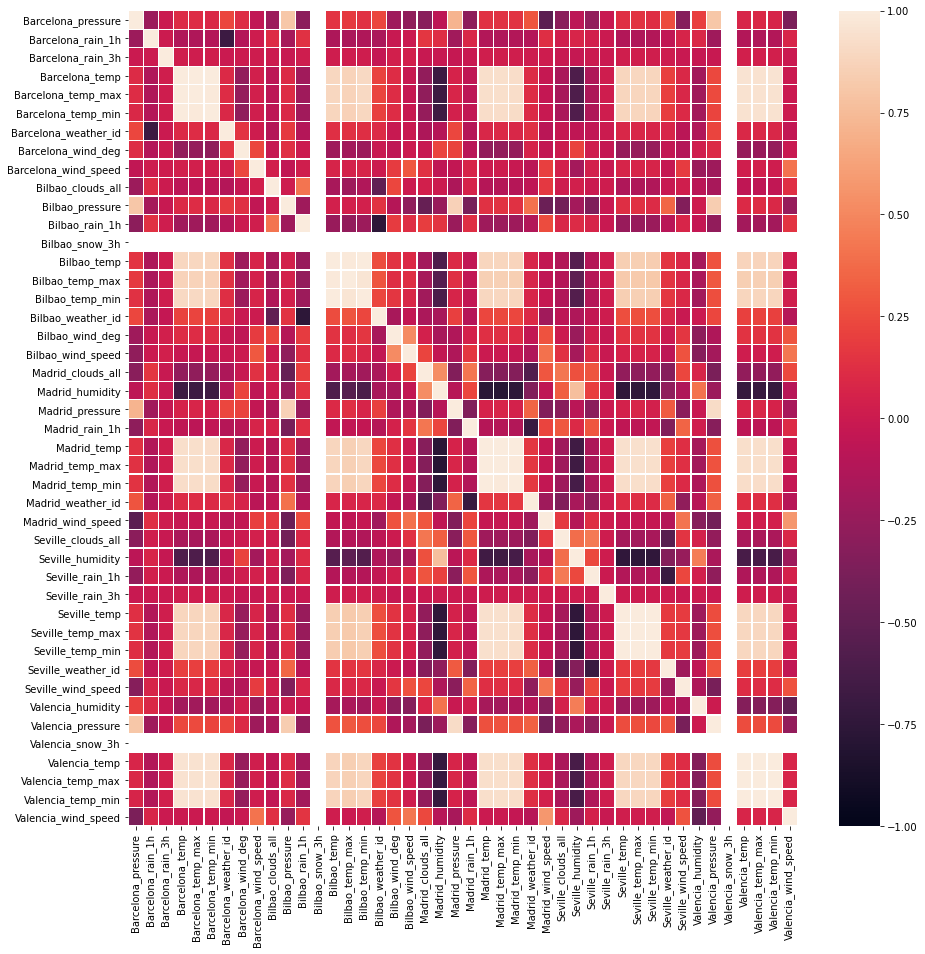

In [48]:
# evaluate correlation
#specify size of heatmap
fig, ax = plt.subplots(figsize=(15, 15))

#create heatmap
sns.heatmap(df.corr(),vmin=-1,vmax=1, linewidths=.3)



In [ ]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# remove missing values/ features

In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic